In [25]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats

#from kaggle eda
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

## The Data

There are two data sets included in the data folder: `Ames_Housing_Price_Data.csv` and `Ames_Real_Estate_Data.csv`.

The `Ames_Housing_Price_Data.csv` set contains $81$ data columns, including the key feature **SalePrice** which will be used as the target of the predictive/descriptive modeling. **PID** refers to the land parcel ID, which can merged on the *MapRefNo* column of the **Ames Accessor Data** (`Ames_Real_Estate_Data.csv`) to find the property address. Using a free service, such as **geopy**, we can find the long-lat coordinates of the houses.

The columns of the data are mostly attributes associated with the land and the houses. There are size related attributes, quality and condition attributes, house attachment attributes, etc.

To establish a foundation for your team's data analytics, we offer some insights on the house sizes vs. prices.

In [144]:
import numpy as np
import pandas as pd
%matplotlib inline 

housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [56]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [185]:
housing['HouseStyle'].value_counts()

1Story    1287
2Story     772
1.5Fin     284
SLvl       117
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: HouseStyle, dtype: int64

In [179]:
housing['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    142
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      53
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Veenker     23
Blmngtn     22
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [177]:
housing['BldgType'].value_counts()

1Fam      2137
TwnhsE     201
Twnhs       98
Duplex      87
2fmCon      54
Name: BldgType, dtype: int64

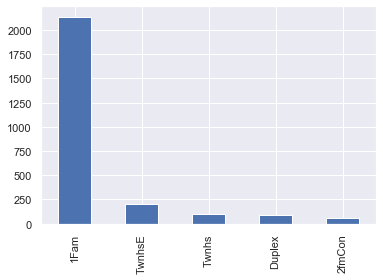

In [176]:
housing['BldgType'].value_counts().plot(kind='bar',y='count', color='b')


In [173]:
housing.columns

SaleType         1
KitchenQual      1
2ndFlrSF         1
ScreenPorch      1
WoodDeckSF       1
Neighborhood     1
SalePrice        1
SaleCondition    1
MSZoning         1
MiscVal          1
Heating          1
RoofStyle        1
PoolArea         1
Utilities        1
GrLivArea        1
3SsnPorch        1
LotArea          1
EnclosedPorch    1
GarageArea       1
Exterior1st      1
YrSold           1
TotalBsmtSF      1
OverallCond      1
HeatingQC        1
BsmtFinSF1       1
LowQualFinSF     1
LotShape         1
RoofMatl         1
FullBath         1
BldgType         1
Fireplaces       1
BsmtFinSF2       1
Electrical       1
ExterCond        1
TotRmsAbvGrd     1
Condition1       1
MoSold           1
Street           1
LotConfig        1
LandContour      1
PID              1
CentralAir       1
PavedDrive       1
HalfBath         1
GarageCars       1
BedroomAbvGr     1
ExterQual        1
Condition2       1
KitchenAbvGr     1
Foundation       1
OpenPorchSF      1
LandSlope        1
1stFlrSF    

In [8]:
realestate = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)
realestate.shape

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(22213, 90)

In [9]:
realestate.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

In [11]:
realestate.head(1)

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD \nOUTLOT V\n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,481100,0,0,481100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


### How Does Price/SqrFt Play a Role in Housing Data Analytics?

In [12]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

In [13]:
price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
1,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0
5,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0


In [14]:
size_related.isnull().sum(axis=0)

GrLivArea        0
LotArea          0
MasVnrArea      14
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
dtype: int64

### Performing Unary Feature Selection

In [15]:
size_related = size_related.fillna(0.0)  # We fill the very minor missing values by 0.0
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     7.306053e-313
1stFlrSF        1.616946e-300
GarageArea      6.423062e-291
MasVnrArea      4.164095e-162
WoodDeckSF       6.015295e-68
OpenPorchSF      2.930048e-57
LotArea          8.303020e-46
2ndFlrSF         4.007008e-42
BsmtUnfSF        8.441921e-18
PoolArea         1.172748e-01
LowQualFinSF     1.173873e-01
dtype: float64

In [16]:
corr = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
corr

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,SalePrice
GrLivArea,1.000000,0.260322,0.385898,0.245993,0.410370,0.539135,0.665001,0.088931,0.476029,0.247716,0.321777,0.057935,0.719981
LotArea,0.260322,1.000000,0.103514,0.019984,0.222261,0.313086,0.022434,-0.000334,0.199159,0.155687,0.084963,0.052636,0.274443
MasVnrArea,0.385898,0.103514,1.000000,0.080349,0.360725,0.361919,0.129439,-0.053804,0.347454,0.149983,0.119097,-0.003637,0.498432
BsmtUnfSF,0.245993,0.019984,0.080349,1.000000,0.422157,0.303093,0.009690,0.048301,0.150678,-0.040390,0.116477,-0.032369,0.168060
TotalBsmtSF,0.410370,0.222261,0.360725,0.422157,1.000000,0.784271,-0.219782,-0.025286,0.465312,0.224190,0.214075,0.009407,0.652494
1stFlrSF,0.539135,0.313086,0.361919,0.303093,0.784271,1.000000,-0.264345,-0.009215,0.480196,0.224613,0.211429,0.076173,0.642613
2ndFlrSF,0.665001,0.022434,0.129439,0.009690,-0.219782,-0.264345,1.000000,0.005935,0.126284,0.087099,0.183689,-0.000226,0.263144
LowQualFinSF,0.088931,-0.000334,-0.053804,0.048301,-0.025286,-0.009215,0.005935,1.000000,-0.033235,-0.007544,-0.003367,-0.005239,-0.030835
GarageArea,0.476029,0.199159,0.347454,0.150678,0.465312,0.480196,0.126284,-0.033235,1.000000,0.239944,0.216076,0.026982,0.634669
WoodDeckSF,0.247716,0.155687,0.149983,-0.040390,0.224190,0.224613,0.087099,-0.007544,0.239944,1.000000,0.032639,0.080744,0.333232


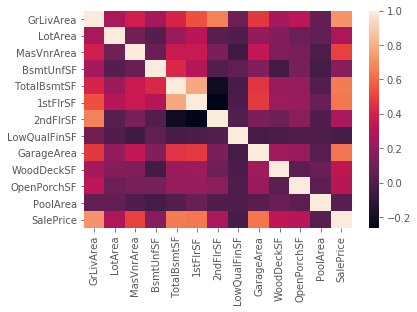

In [17]:
sns.heatmap(corr) #using seasborn imported above

### GrLivArea 

Most of the size related columns have significant p-values on their correlations with **SalePrice**. The **Gross Living Area** (GrLivArea) has a vanishing p-value, which indicates a very strong statistical relationship. We will focus our research on **GrLivArea**.


**question: what do they mean by vanishing p-value?**

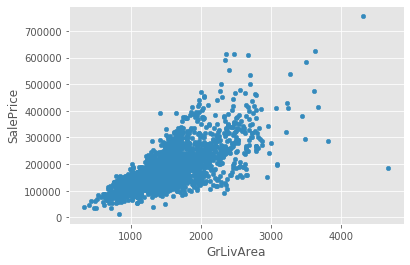

In [18]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')


In [19]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.5183732056699006

In [20]:
lm.fit(np.log10(grLivArea), np.log10(price))
lm.score(np.log10(grLivArea), np.log10(price))

#slight better score with log of liv area

0.5400973491971155

In [21]:
lm.intercept_, lm.coef_

(2.442342023027404, array([0.88110363]))

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [24]:
housing['SalePrice'].describe()

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64

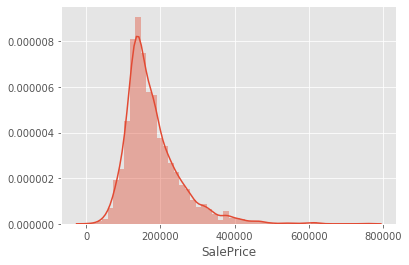

In [35]:
#histogram
sns.distplot(housing['SalePrice']);

In [36]:
#skewness and kurtosis
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())

Skewness: 1.760802
Kurtosis: 5.432800


# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

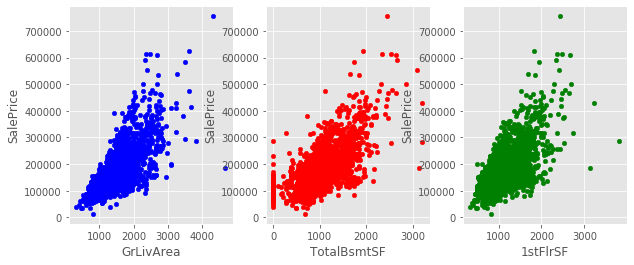

In [32]:
## load data into pandas dataframe
import pandas as pd
housing.head()
## Visualizing data, shown are Sales vs TV, Radio and Newspaper
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
housing.plot(ax=axes[0], kind='scatter', x='GrLivArea', y='SalePrice',c='b')
housing.plot(ax=axes[1], kind='scatter', x='TotalBsmtSF', y='SalePrice',c='r')
housing.plot(ax=axes[2], kind='scatter', x='1stFlrSF', y='SalePrice',c='g')
plt.show()

- GrLivArea, TotalBsmtSF, and 1stFlrSF all seem to have a positive linear relationship with sales price

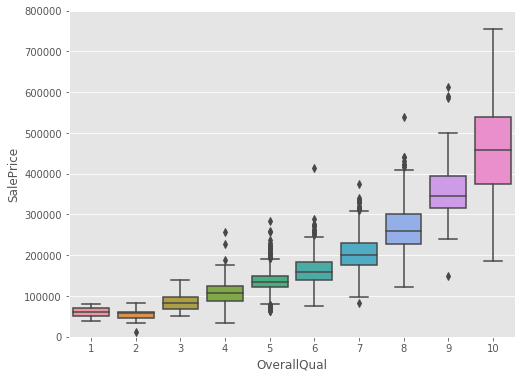

In [38]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#house prices increases when quality increases

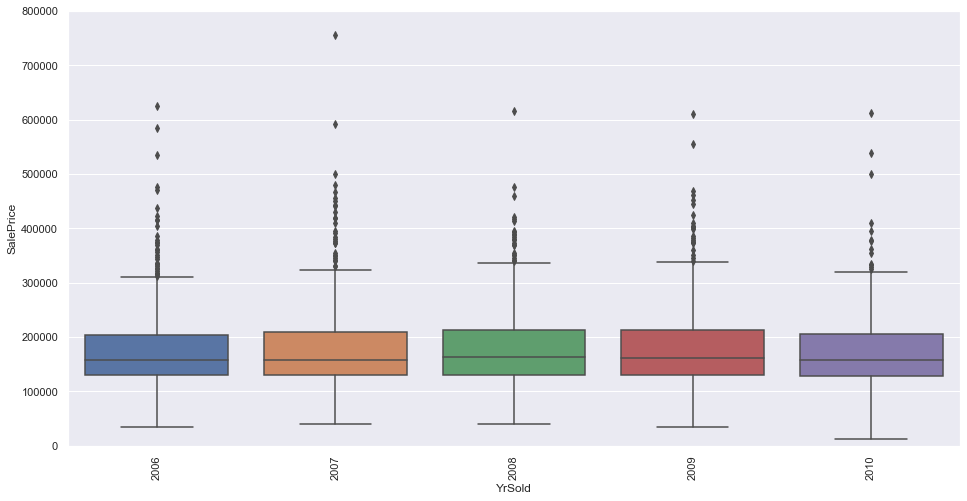

In [178]:
var = 'YrSold'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


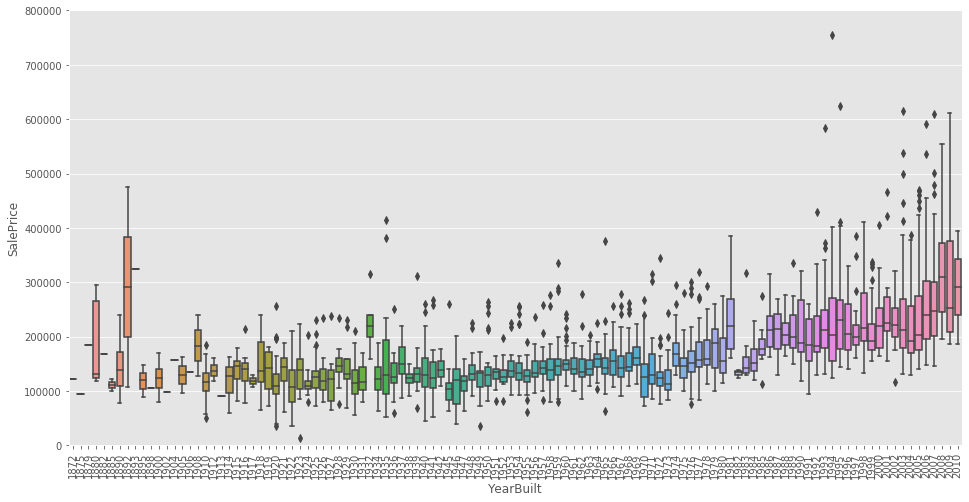

In [39]:
var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#Although it's not a strong tendency, 
#SalePrice' increases for newer houses

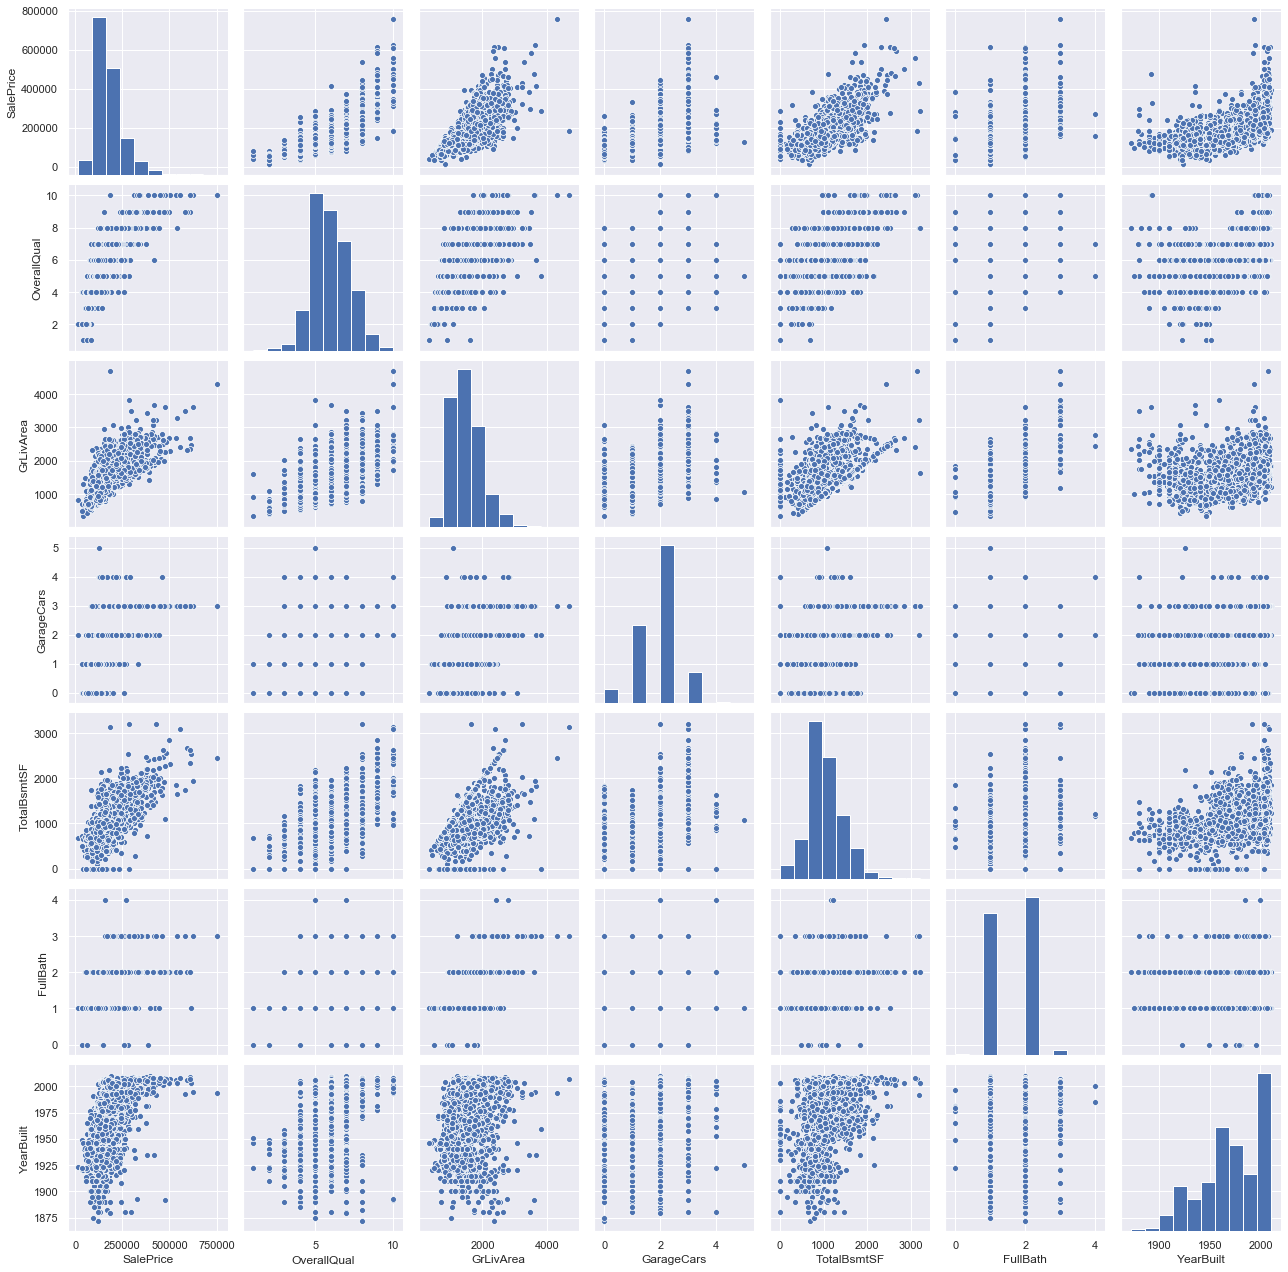

In [41]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols], size = 2.5)
plt.show();

## Dealing with Missing Data

In [145]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,2571,0.996512
MiscFeature,2483,0.962403
Alley,2412,0.934884
Fence,2055,0.796512
FireplaceQu,1241,0.481008
LotFrontage,462,0.179070
GarageQual,129,0.050000
GarageYrBlt,129,0.050000
GarageFinish,129,0.050000
GarageCond,129,0.050000


In [152]:
#dealing with missing data
housing = housing.drop((missing_data[missing_data['Total'] > 1]).index,1)
housing = housing.drop(housing.loc[housing['Electrical'].isnull()].index)
housing.isnull().sum().max() #just checking that there's no missing data missing



1

In [160]:
#missing data
housing_na = housing.dropna(subset=['GrLivArea', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea'])
housing_na.shape
housing_na.head()
#just checking that there's no missing data missing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,7890,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,238.0,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1,0,2,1,TA,4,Typ,1,2.0,399.0,Y,0,0,0,0,166,0,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,Gd,TA,CBlock,552.0,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,2,0,2,1,Gd,5,Typ,0,1.0,266.0,Y,0,105,0,0,0,0,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),6060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,Gd,TA,BrkTil,737.0,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,1,0,2,1,Gd,5,Typ,0,1.0,216.0,N,154,0,42,86,0,0,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,8146,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,Gd,Gd,BrkTil,0.0,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,1,0,2,1,TA,6,Typ,0,1.0,281.0,N,0,0,168,0,111,0,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,643.0,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,2,1,3,1,Gd,6,Typ,0,2.0,528.0,Y,0,45,0,0,0,0,0,11,2009,WD,Normal


In [74]:
#dealing with missing data
housing2 = housing.dropna(subset=['GrLivArea', 'TotalBsmtSF', '1stFlrSF'])
housing2.shape

(2579, 81)

In [78]:
housing2[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']].mean()

GrLivArea      1486.268709
TotalBsmtSF    1036.686700
1stFlrSF       1145.071733
dtype: float64

In [83]:
## separate the input variables and output variables
X = housing2[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']]  # input varialbe
Y = housing2['SalePrice']  # output variable
ols.fit(X, Y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, Y)))
print("Predicted Sale Price: %f" %(ols.predict([[1486, 1036, 1145]])))

Intercept: -27428.514862
Coefficients: [81.97002222 72.3120167   7.62586559]
R^2: 0.671980
Predicted Sale Price: 178025.803570


In [84]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.577000e+03,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2576.000000,2576.000000,2576.000000,2576.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2576.000000,2576.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,7.148966e+08,1486.047342,178047.880481,57.658130,10122.779589,6.045790,5.619325,1970.273962,1983.726814,444.442935,53.300854,539.172748,1036.916537,1145.116414,336.681412,4.249515,1.550252,0.377959,2.850601,1.040357,6.386108,0.604191,1.746894,466.835016,95.937136,46.121847,23.241366,2.514164,16.219247,1.663950,48.788126,6.150951,2007.839348
std,1.886590e+08,488.926708,75068.260932,42.807128,8130.656236,1.367689,1.122462,29.713830,20.488840,429.221385,174.516025,425.398470,418.494060,375.907373,424.155322,44.429215,0.545927,0.499172,0.823161,0.202664,1.535656,0.648779,0.738662,207.563063,129.109952,66.089442,64.140247,25.308514,56.855172,30.357005,499.012606,2.669145,1.312489
min,5.263011e+08,334.000000,12789.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129900.000000,20.000000,7407.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,214.750000,792.750000,872.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354551e+08,1436.000000,159900.000000,50.000000,9382.000000,6.000000,5.000000,1972.000000,1992.000000,384.500000,0.000000,448.000000,979.500000,1072.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,474.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209500.000000,70.000000,11500.000000,7.000000,6.000000,1999.000000,2003.000000,732.000000,0.000000,784.000000,1266.250000,1364.000000,703.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,4.000000,2.000000,6.000000,3.000000,13.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [88]:
housing.sample(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
156,528439060,1432,245000,20,RL,9139,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Gd,TA,PConc,379.0,0.0,1043.0,1422.0,GasA,Ex,Y,SBrkr,1432,0,0,2,0,3,1,Gd,7,Typ,1,2.0,492.0,Y,297,50,0,0,0,0,0,9,2009,WD,Normal
731,907255050,1787,275000,20,RL,14781,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,Gd,TA,PConc,0.0,0.0,1753.0,1753.0,GasA,Ex,Y,SBrkr,1787,0,0,2,0,3,1,Gd,7,Typ,1,3.0,748.0,Y,198,150,0,0,0,0,0,8,2006,WD,Normal
214,527452100,958,128000,120,RL,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,120.0,0.0,958.0,1078.0,GasA,TA,Y,SBrkr,958,0,0,2,0,2,1,TA,5,Typ,1,2.0,440.0,Y,0,205,0,0,0,0,0,2,2007,WD,Normal
150,909251040,1298,146500,50,RL,6821,Pave,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1921,2005,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,BrkTil,113.0,0.0,538.0,651.0,GasA,Gd,Y,SBrkr,759,539,0,2,0,2,1,TA,8,Typ,1,1.0,240.0,P,216,0,168,0,0,0,0,8,2007,WD,Normal
706,528240030,1630,189500,60,RL,7984,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,0.0,0.0,868.0,868.0,GasA,Ex,Y,SBrkr,868,762,0,2,1,3,1,Gd,7,Typ,1,2.0,436.0,Y,120,48,0,0,0,0,0,9,2009,WD,Normal
300,903206120,2068,209500,75,RL,7793,Pave,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,2.5Unf,7,7,1922,2005,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,BrkTil,474.0,0.0,634.0,1108.0,GasA,TA,N,FuseA,1160,908,0,1,1,3,1,Gd,8,Typ,1,1.0,315.0,Y,0,0,60,0,0,0,0,5,2010,WD,Normal
558,902106120,1022,89500,30,RM,4480,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1922,1950,Gable,CompShg,AsbShng,AsbShng,TA,TA,PConc,782.0,0.0,240.0,1022.0,GasA,TA,N,FuseF,1022,0,0,1,0,2,1,Fa,4,Typ,1,1.0,184.0,N,0,122,20,0,0,0,0,2,2007,WD,Normal
332,907252050,1762,222000,60,RL,9930,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,456.0,0.0,370.0,826.0,GasA,Ex,Y,SBrkr,878,884,0,2,1,3,1,Gd,6,Typ,0,2.0,591.0,Y,320,54,0,0,0,0,0,7,2006,WD,Normal
762,903228120,904,119000,45,RM,6000,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,7,1926,2004,Gable,CompShg,Wd Sdng,Wd Sdng,Gd,TA,PConc,0.0,0.0,884.0,884.0,GasA,Gd,Y,SBrkr,904,0,0,1,0,2,1,TA,4,Typ,0,1.0,180.0,Y,0,0,105,0,0,0,0,1,2009,WD,Normal
625,906230020,2787,269500,90,RL,7939,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,TA,TA,PConc,820.0,0.0,348.0,1168.0,GasA,Ex,Y,SBrkr,1168,1619,0,4,2,6,2,TA,8,Typ,2,4.0,820.0,Y,312,0,0,0,0,0,0,10,2009,WD,Normal


### categorical input variables

In [93]:
# Kitchen Quality 

KitchenQual_dummy = pd.get_dummies(housing['KitchenQual'])
KitchenQual_dummy.head()


,Ex,Fa,Gd,Po,TA
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
5,0,0,1,0,0


In [94]:
KitchenQual_dummy.drop('Ex', 1)

,Fa,Gd,Po,TA
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1
8,0,1,0,0
9,0,0,0,1
10,0,1,0,0


In [95]:
pd.DataFrame(housing.columns, columns=['Column_Name'])

,Column_Name
0,PID
1,GrLivArea
2,SalePrice
3,MSSubClass
4,MSZoning
5,LotArea
6,Street
7,LotShape
8,LandContour
9,Utilities


In [180]:
X = housing_na.filter(regex='SF$|Area$')
y = housing_na['SalePrice']

X.describe()

,GrLivArea,LotArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,1486.143689,10124.816699,539.261359,1036.985631,1145.292039,336.598835,4.252816,466.907573,95.944078,46.157670,1.665243
std,488.931868,8133.369316,425.457317,418.560649,375.999972,424.129992,44.446315,207.570701,129.137092,66.102602,30.368761
min,334.000000,1300.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1112.000000,7411.000000,214.500000,792.500000,872.000000,0.000000,0.000000,318.000000,0.000000,0.000000,0.000000
50%,1436.000000,9400.000000,448.000000,980.000000,1072.000000,0.000000,0.000000,474.000000,0.000000,26.000000,0.000000
75%,1733.000000,11500.000000,784.000000,1266.500000,1364.000000,702.500000,0.000000,576.000000,168.000000,68.000000,0.000000
max,4676.000000,215245.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,1488.000000,1424.000000,742.000000,800.000000


In [181]:
from sklearn.model_selection import train_test_split
# np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)


In [184]:
ols.fit(X, y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, y)))
# print("Predicted Sale Price: %f" %(ols.predict([[1486, 1036, 1145]])))



Intercept: -30162.548807
Coefficients: [ 32.80038241   0.12481581 -25.70843749  71.9727326   35.43126124
  38.0987585  -40.72963732  82.16837174  40.23439166  45.40338697
 -43.49630919]
R^2: 0.745400


#### dealing with outliers


In [167]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(housing_na['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.20247416]
 [-1.90787898]
 [-1.90654663]
 [-1.90240304]
 [-1.84925573]
 [-1.8399293 ]
 [-1.77331196]
 [-1.75332676]
 [-1.70669463]
 [-1.68004769]]

outer range (high) of the distribution:
[[4.75518689]
 [4.7951573 ]
 [5.02165624]
 [5.41469851]
 [5.50912193]
 [5.75444692]
 [5.77652391]
 [5.82106426]
 [5.95429893]
 [7.68634965]]


In [168]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()

ols.fit(X_train, y_train)

print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))


R^2 for train set: 0.745573
--------------------------------------------------
R^2 for test  set: 0.742067


In [114]:
import pandas as pd

## separate the input variables and output variables
X1 = housing2[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']]  # input varialbe
y1 = housing2['SalePrice']  # output variable

X1.describe()

,GrLivArea,TotalBsmtSF,1stFlrSF
count,2579.000000,2579.000000,2579.000000
mean,1486.268709,1036.686700,1145.071733
std,488.606716,418.555417,375.999878
min,334.000000,0.000000,334.000000
25%,1112.000000,792.000000,871.500000
50%,1436.000000,979.000000,1072.000000
75%,1733.000000,1266.500000,1364.000000
max,4676.000000,3206.000000,3820.000000


In [117]:
# try:  # train_test_split was moved in 0.18.0
#     from sklearn.model_selection import train_test_split
# except:  # Following import works through 0.19 but outputs a warning in 0.18
#     from sklearn.cross_validation import train_test_split
# X1_train, X1_test, y1_train, y1_test = train_test_split(housing2, y1, test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
# np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42, test_size=0.2)




In [119]:
#### Your code here
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()

ols.fit(X1_train, y1_train)

print("R^2 for train set: %f" %ols.score(X1_train, y1_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X1_test, y1_test))



R^2 for train set: 0.677546
--------------------------------------------------
R^2 for test  set: 0.647156


In [123]:
# lasso
from sklearn.linear_model import Lasso

lasso = Lasso(normalize = True, alpha = 1e-4)
lasso.fit(X1, y1)

for ftname, beta in zip( X1.columns, lasso.coef_ ):
    print( f"{ftname}>> {beta}")

GrLivArea>> 81.97001735021458
TotalBsmtSF>> 72.31206845550813
1stFlrSF>> 7.625810294280245


In [124]:
#ridge
from sklearn.linear_model import Ridge

ridge = Ridge(normalize = True, alpha = 1e-4)
ridge.fit(X1, y1)

for ftname, beta in zip( X1.columns, ridge.coef_ ):
    print( f"{ftname}>> {beta}")

GrLivArea>> 81.95863410039205
TotalBsmtSF>> 72.29415609420461
1stFlrSF>> 7.648677703990276


In [ ]:
# Detecting Multicollinearity Among Features


In [128]:
housing2.sample(3)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
26,528218100,1458,168165,60,RL,58.0,13204,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,44.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,608.0,608.0,GasA,Ex,Y,SBrkr,608,850,0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,454.0,TA,TA,Y,100,33,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
674,527126030,1652,251000,120,RL,41.0,5330,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2000,2000,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1196.0,Unf,0.0,298.0,1494.0,GasA,Ex,Y,SBrkr,1652,0,0,1.0,0.0,2,0,2,1,Ex,6,Typ,0,NaN,Attchd,2000.0,RFn,2.0,499.0,TA,TA,Y,96,48,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
619,534250010,1656,135000,90,RL,87.0,9246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Feedr,Norm,Duplex,1Story,5,5,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,564.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1656.0,1656.0,GasA,TA,Y,SBrkr,1656,0,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Detchd,1973.0,Unf,2.0,506.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal


In [135]:
continuous_features.sample(3).astype('float')

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
269,1374.0,9434.0,0.0,384.0,384.0,744.0,630.0,0.0,400.0,100.0,0.0,0.0
479,1654.0,8927.0,0.0,0.0,0.0,1286.0,368.0,0.0,528.0,0.0,0.0,0.0
429,918.0,8750.0,50.0,98.0,852.0,918.0,0.0,0.0,360.0,192.0,84.0,0.0


In [136]:
continuous_features = housing2.filter(regex='SF$|Area$')
continuous_features = continuous_features.sample(3).astype('float')
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                housing3     = housing2.copy()
                feature = housing3[feature_name].copy()
                housing3.drop(feature_name, axis=1, inplace=True)
                ols2.fit(housing3, feature)
                scores[feature_name] = ols2.score(housing3, feature)   

ValueError: could not convert string to float: 'RL'